####### 1. ########
Duration :  4.074666666666666
Sample freq :  48000


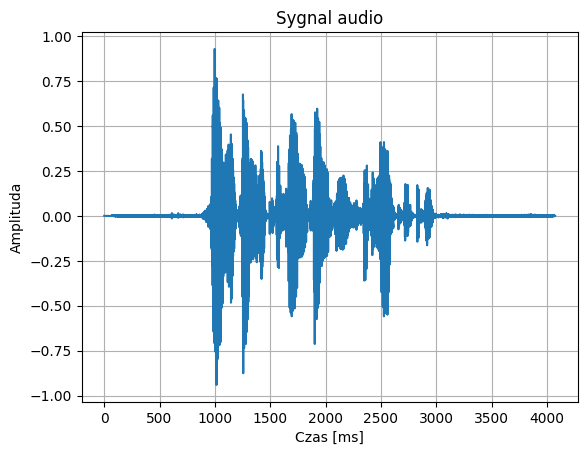

In [25]:
from matplotlib import pyplot as plt
import numpy as np
import sounddevice as sd
import soundfile as sf

print("####### 1. ########")
s,fs = sf.read('./audio/audio_test.wav',dtype='float32')
if len(s.shape) > 1:
    s = s[:,0]

duration = len(s) / fs
print("Duration : ", duration)
print("Sample freq : ", fs)
time = np.arange(len(s)) / fs * 1000
plt.plot(time,s)
plt.xlabel("Czas [ms]")
plt.ylabel("Amplituda")
plt.title("Sygnal audio")
plt.grid(True)
plt.show()

srednia amp. szumu (poczatek) :  0.0011193239
srednia amp. szumu (koniec) :  0.001559762


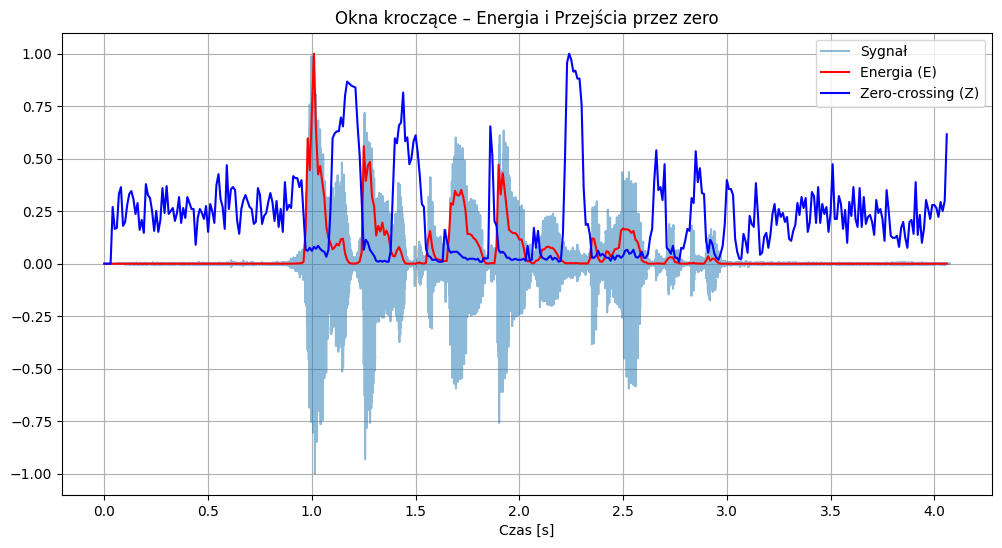

In [26]:
s = s / np.max(np.abs(s))
start = s[:int(0.5 * fs)]
end = s[-int(0.5 * fs):]

print("srednia amp. szumu (poczatek) : ", np.mean(np.abs(start)))
print("srednia amp. szumu (koniec) : ", (np.mean(np.abs(end))))

###### 2

import numpy as np
import matplotlib.pyplot as plt

frame_ms = 10
frame_len = int(fs * frame_ms / 1000)
num_frames = len(s) // frame_len

s_trimmed = s[:num_frames * frame_len]

frames = s_trimmed.reshape(num_frames, frame_len)

E = np.sum(frames**2, axis=1)
Z = np.sum(np.abs(np.diff(np.sign(frames))) > 0, axis=1)

E = E / np.max(E)
Z = Z / np.max(Z)

frame_times = np.arange(num_frames) * (frame_len / fs)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(s)) / fs, s, label='Sygnał', alpha=0.5)
plt.plot(frame_times, E, 'r-', label='Energia (E)')
plt.plot(frame_times, Z, 'b-', label='Zero-crossing (Z)')
plt.xlabel("Czas [s]")
plt.title("Okna kroczące – Energia i Przejścia przez zero")
plt.legend()
plt.grid(True)
plt.show()



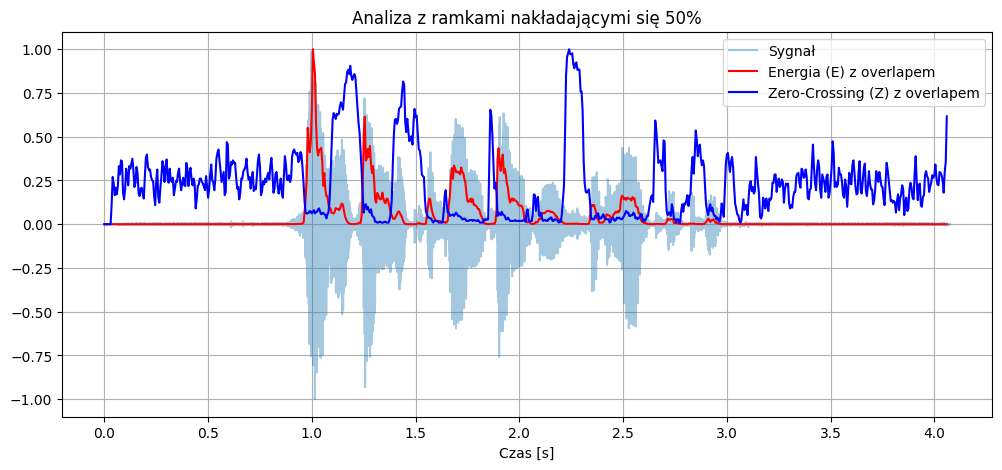

In [27]:
def calculate_overlap(signal, fs, frame_ms=10,overlap=0.5):
    frame_len = int(fs*frame_ms / 1000)
    hop_len = int(frame_len*(1-overlap))
    num_frames = (len(signal) - frame_len) // hop_len + 1

    E = []
    Z = []
    times = []
    for i in range(num_frames):
        start = i * hop_len
        frame = signal[start:start+frame_len]
        zero_cross = np.sum(np.abs(np.diff(np.sign(frame))) > 0)
        energy = np.sum(frame**2)
        E.append(energy)
        Z.append(zero_cross)
        times.append(start/fs)
    
    E = np.array(E)/ np.max(E)
    Z = np.array(Z)/ np.max(Z)

    return np.array(times),E,Z


t,E,Z = calculate_overlap(s,fs,frame_ms=10,overlap=0.5)
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(s)) / fs, s, label='Sygnał', alpha=0.4)
plt.plot(t, E, 'r-', label='Energia (E) z overlapem')
plt.plot(t, Z, 'b-', label='Zero-Crossing (Z) z overlapem')
plt.xlabel("Czas [s]")
plt.title("Analiza z ramkami nakładającymi się 50%")
plt.legend()
plt.grid(True)
plt.show()

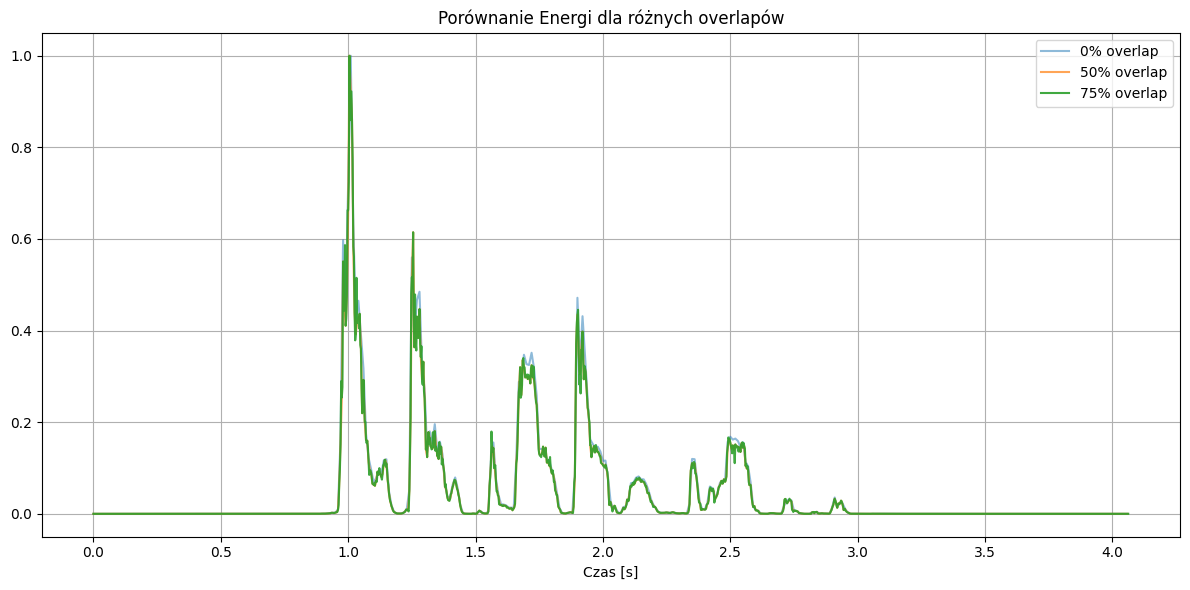

In [28]:
t1, E1, Z1 = calculate_overlap(s, fs, frame_ms=10, overlap=0.0)
t2, E2, Z2 = calculate_overlap(s, fs, frame_ms=10, overlap=0.5)
t3, E3, Z3 = calculate_overlap(s, fs, frame_ms=10, overlap=0.75)

plt.figure(figsize=(12, 6))
plt.plot(t1, E1, label="0% overlap", alpha=0.5)
plt.plot(t2, E2, label="50% overlap", alpha=0.7)
plt.plot(t3, E3, label="75% overlap", alpha=0.9)
plt.title("Porównanie Energi dla różnych overlapów")
plt.xlabel("Czas [s]")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


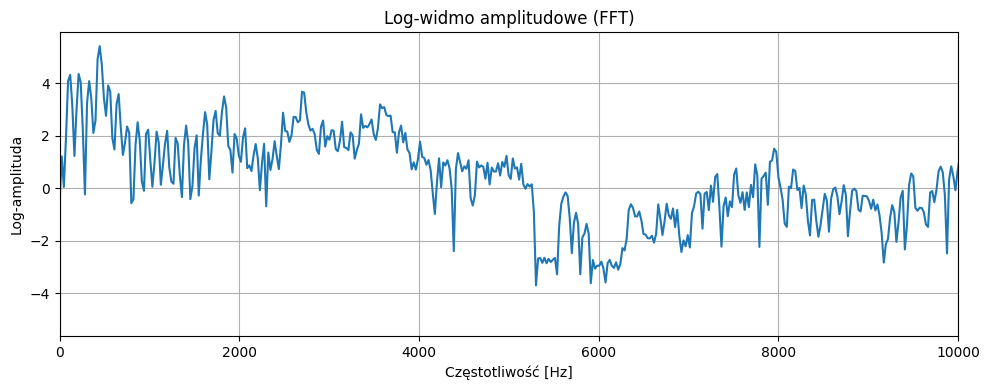

In [29]:
import scipy.fftpack

start_sec = 1.0
end_sec = 1.4

start_sample = int(start_sec * fs)
end_sample = int(end_sec * fs)

fragment = s[start_sample:end_sample]
fragment = fragment[:2048]

okno_hamm = np.hamming(len(fragment))
zamaskowane = fragment * okno_hamm

yf = scipy.fftpack.fft(zamaskowane)
magnitude = np.abs(yf[:len(yf)//2])
log_magnitude = np.log(magnitude + 1e-10)

freqs = np.linspace(0, fs/2, len(magnitude))

plt.figure(figsize=(10, 4))
plt.plot(freqs, log_magnitude)
plt.title("Log-widmo amplitudowe (FFT)")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Log-amplituda")
plt.grid(True)
plt.xlim(0, 10000)
plt.tight_layout()
plt.show()


In [30]:
min_idx = int(100 * len(freqs) / (fs / 2))
peak_idx = np.argmax(magnitude[min_idx:]) + min_idx
F0 = freqs[peak_idx]

print(f"Częstotliwość podstawowa F0 ≈ {F0:.1f} Hz")


Częstotliwość podstawowa F0 ≈ 445.7 Hz
